<a href="https://colab.research.google.com/github/abidlatif/abidlatif/blob/main/Tesla_Stock_Price_Prediction_fb_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tesla Stock Price Prediction Using Facebook Prophet**

In [1]:
import pandas as pd 
import plotly.express as px
from fbprophet import Prophet

In [2]:
import plotly.io as pio
pio.renderers.default='colab'

In [3]:
df = pd.read_csv("TSLA.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       254 non-null    object 
 1   Open       254 non-null    float64
 2   High       254 non-null    float64
 3   Low        254 non-null    float64
 4   Close      254 non-null    float64
 5   Adj Close  254 non-null    float64
 6   Volume     254 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,795.131614,811.533817,776.553505,794.456719,794.456719,2.673051e+07
std,173.812314,179.384402,167.215069,173.462399,173.462399,1.133066e+07
min,552.549988,566.210022,539.489990,563.000000,563.000000,7.395112e+06
25%,670.187500,684.324997,652.210007,668.179993,668.179993,1.882018e+07
50%,727.400024,741.479981,713.535003,731.569976,731.569976,2.446625e+07
75%,909.215011,930.555008,889.750015,916.220016,916.220016,3.143215e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,8.939650e+07


In [8]:
px.area(df, x="Date", y="Close")

In [9]:
px.line(df, x="Date", y="Close")

In [10]:
px.area(df, x="Date", y="Volume")

In [11]:
px.bar(df, y="Volume")

In [12]:
px.box(df, y="Close")

In [13]:
columns=["Date","Close"]
ndf= pd.DataFrame(df, columns=columns)

In [14]:
ndf


,Date,Close
0,2021-01-26,883.090027
1,2021-01-27,864.159973
2,2021-01-28,835.429993
3,2021-01-29,793.530029
4,2021-02-01,839.809998
...,...,...
249,2022-01-20,996.270020
250,2022-01-21,943.900024
251,2022-01-24,930.000000
252,2022-01-25,918.400024


In [15]:
prohet_df= ndf.rename(columns={'Date':'ds', 'Close':'y'})

In [16]:
prohet_df


,ds,y
0,2021-01-26,883.090027
1,2021-01-27,864.159973
2,2021-01-28,835.429993
3,2021-01-29,793.530029
4,2021-02-01,839.809998
...,...,...
249,2022-01-20,996.270020
250,2022-01-21,943.900024
251,2022-01-24,930.000000
252,2022-01-25,918.400024


In [17]:
m=Prophet()

In [18]:
m.fit(prohet_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
future=m.make_future_dataframe(periods=30)
forecast=m.predict(future)

In [20]:
forecast


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-26,812.555159,727.556689,885.549893,812.555159,812.555159,-12.552256,-12.552256,-12.552256,-12.552256,-12.552256,-12.552256,0.0,0.0,0.0,800.002903
1,2021-01-27,810.663017,713.840285,875.434612,810.663017,810.663017,-11.255212,-11.255212,-11.255212,-11.255212,-11.255212,-11.255212,0.0,0.0,0.0,799.407806
2,2021-01-28,808.770876,712.234542,871.859890,808.770876,808.770876,-15.451648,-15.451648,-15.451648,-15.451648,-15.451648,-15.451648,0.0,0.0,0.0,793.319228
3,2021-01-29,806.878735,711.421790,869.916464,806.878735,806.878735,-16.773510,-16.773510,-16.773510,-16.773510,-16.773510,-16.773510,0.0,0.0,0.0,790.105224
4,2021-02-01,801.202310,708.828873,870.166898,801.202310,801.202310,-10.999279,-10.999279,-10.999279,-10.999279,-10.999279,-10.999279,0.0,0.0,0.0,790.203032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,2022-02-21,1076.910576,986.138752,1140.914641,1064.978765,1090.165960,-10.999279,-10.999279,-10.999279,-10.999279,-10.999279,-10.999279,0.0,0.0,0.0,1065.911297
280,2022-02-22,1077.289680,978.597386,1140.281541,1064.231825,1091.200852,-12.552256,-12.552256,-12.552256,-12.552256,-12.552256,-12.552256,0.0,0.0,0.0,1064.737425
281,2022-02-23,1077.668785,986.990354,1155.792652,1063.344825,1092.402620,-11.255212,-11.255212,-11.255212,-11.255212,-11.255212,-11.255212,0.0,0.0,0.0,1066.413573
282,2022-02-24,1078.047890,986.827446,1145.854233,1062.528947,1093.276701,-15.451648,-15.451648,-15.451648,-15.451648,-15.451648,-15.451648,0.0,0.0,0.0,1062.596242


In [21]:
px.line(forecast, x="ds", y="yhat")

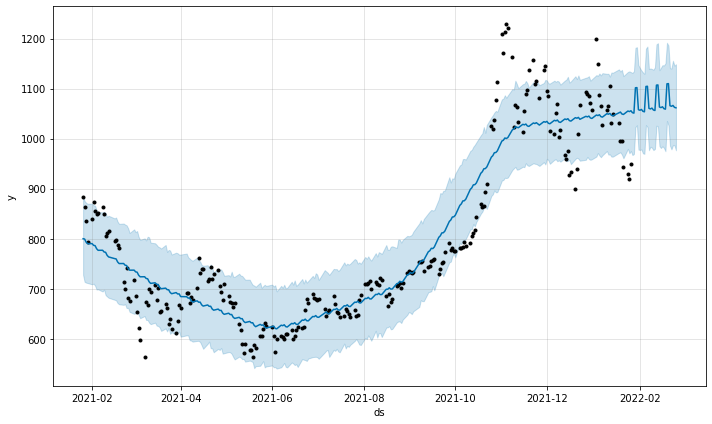

In [22]:
figure = m.plot(forecast, xlabel="ds", ylabel="y")

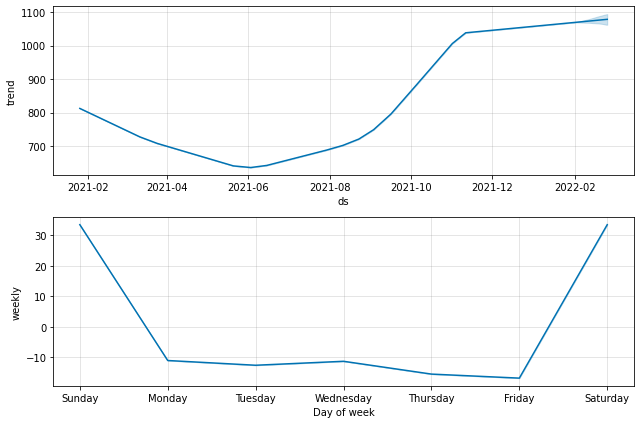

In [23]:
figure2=m.plot_components(forecast)

In [24]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>